In [258]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [259]:
# Specify path to merged dataset
merged_dataset = "data/merged_school_zhi_value.csv"

# Load merged dataset into dataframe and drop error column
df = pd.read_csv(merged_dataset)
merged_df = df.drop(columns="Unnamed: 0")

# Remove unnecessary rows and rename incorrect column
math_df = merged_df.drop(columns=["English Language Arts Achievement", "English Language Arts Learning Gains", "English Language Arts Learning Gains of the Lowest 25%", "Mathematics Learning Gains", "Mathematics Learning Gains of the Lowest 25%", "Science Achievement", "Social Studies Achievement", "Middle School Acceleration", "Graduation Rate 2017-18", "College and Career Acceleration 2017-18", "Total Components", "Grade 2008", "Grade 2007", "Grade 2006", "Grade 2005", "Grade 2004", "Grade 2003", "Grade 2002", "Grade 2001", "Grade 2000", "Grade 1999", "2020-01", "2020-02"])
math_df.rename(columns={"Informational Baseline Grade 2015":"Grade 2015"}, inplace=True)
math_df.dropna(inplace=True)
math_df.head()

,Zip Code,School Name,Mathematics Achievement,Total Points Earned,Percent of Total Possible Points,Grade 2019,Grade 2018,Grade 2017,Grade 2016,Grade 2015,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,32603,J. J. FINLEY ELEMENTARY SCHOOL,56.0,377.0,54.0,B,C,B,B,A,...,279827.0,283381.0,286035.0,287334.0,287821.0,289008.0,290524.0,291696.0,291216.0,291212.0
1,32609,STEPHEN FOSTER ELEMENTARY SCHOOL,69.0,395.0,56.0,B,C,B,C,A,...,132431.0,132669.0,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0
2,32641,LAKE FOREST ELEMENTARY SCHOOL,26.0,223.0,32.0,D,D,C,F,F,...,101256.0,101874.0,102785.0,103191.0,103928.0,104809.0,106085.0,107431.0,108637.0,109839.0
3,32605,LITTLEWOOD ELEMENTARY SCHOOL,61.0,407.0,58.0,B,B,C,B,B,...,207175.0,207517.0,207737.0,208196.0,208743.0,209731.0,211050.0,212435.0,213381.0,214302.0
4,32609,W. A. METCALFE ELEMENTARY SCHOOL,48.0,386.0,55.0,B,D,D,C,D,...,132431.0,132669.0,133012.0,133550.0,134383.0,135429.0,137031.0,138650.0,140052.0,141110.0


In [260]:
# Create an identical dataframe to math_df with numbers representing letter grades
scores_df = math_df
scores_df['Grade 2019'] = scores_df['Grade 2019'].replace(
    {'A': 5, 'B': 4,'C': 3,'D': 2,'F': 1, 'I': 0 })

In [261]:
# Save summary statistics into variables
mean = math_df["Mathematics Achievement"].mean()
median = math_df["Mathematics Achievement"].median()
variance = math_df["Mathematics Achievement"].var()
stdv = math_df["Mathematics Achievement"].std()
sem = math_df["Mathematics Achievement"].sem()

# Save summary variables into a dataframe
math_summary_table = pd.DataFrame({"Mean": [mean], "Median": [median], "Variance": [variance], "Standard Deviation": [stdv], "SEM": [sem]})
print("Mathematics Achievement Scores")
math_summary_table

Mathematics Achievement Scores


,Mean,Median,Variance,Standard Deviation,SEM
0,60.152594,60.0,270.844509,16.457354,0.32024


In [262]:
# Group dataframe by zip code
zip_df = math_df.groupby(["Zip Code"])
zip_letter_df = scores_df.groupby(["Zip Code"])

# Get the mean and median of grades and housing prices
grades_mean = zip_df["Mathematics Achievement"].mean()
grades_median = zip_df["Mathematics Achievement"].median()
grades_2019 = zip_letter_df["Grade 2019"].mean()

# Convert housing prices to a list and then store averages from that list in a variable
house_average_list = ['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']
zhvi_01_19 = zip_df["2019-01"].mean()
zhvi_12_19 = zip_df["2019-12"].mean()
zhvi_2019_df = math_df.groupby(["Zip Code"])['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'].mean()

# Create new column to store total 2019 zhvi average
zhvi_2019_df["2019 ZHVI Avg"] = zhvi_2019_df.mean(axis=1)
zhvi_2019 = zhvi_2019_df["2019 ZHVI Avg"]

# Create dataframe from variables
table_1 = pd.DataFrame({"Avg Math Score": grades_mean, "Median Math Score": grades_median, "Jan. ZHVI Avg": zhvi_01_19, "Dec. ZHVI Avg": zhvi_12_19, "2019 ZHVI Avg": zhvi_2019, "2019 Grade": grades_2019})
print("2019 Grades and Housing Summary Table")
table_1

2019 Grades and Housing Summary Table


,Avg Math Score,Median Math Score,Jan. ZHVI Avg,Dec. ZHVI Avg,2019 ZHVI Avg,2019 Grade
Zip Code,,,,,,
32003,78.250000,81.0,287864.0,293166.0,290356.166667,5.000000
32009,87.000000,87.0,228914.0,241314.0,234154.083333,5.000000
32011,71.333333,73.0,218095.0,233539.0,225349.333333,4.666667
32024,74.000000,74.0,179343.0,183302.0,182597.666667,5.000000
32025,61.666667,58.5,131535.0,135166.0,134160.833333,4.000000
...,...,...,...,...,...,...
34987,65.000000,65.0,276034.0,276785.0,276487.750000,4.500000
34990,79.500000,78.0,392507.0,395699.0,393074.583333,5.000000
34994,67.666667,72.0,294019.0,298578.0,296011.333333,4.666667


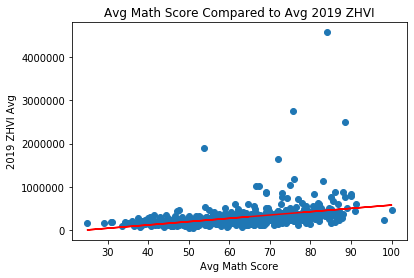

The linear regression equation is y = 7632.02x + -178579.53
The correlation is equal to 0.38


In [263]:
# Calculate the correlation coefficient
avg_math_score = table_1.iloc[:,0]
avg_2019_zhvi = table_1.iloc[:,4]
avg_2019_grades = table_1.iloc[:,5]
correlation = sts.pearsonr(avg_math_score,avg_2019_zhvi)

# Plot the correlation
x_values = table_1["Avg Math Score"]
y_values = table_1["2019 ZHVI Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Avg Math Score")
plt.ylabel("2019 ZHVI Avg")
plt.title("Avg Math Score Compared to Avg 2019 ZHVI")
plt.show()

# Print regression equation and correlation coefficient
print(f"The linear regression equation is {line_eq}")
print(f"The correlation is equal to {round(correlation[0],2)}")

In [264]:
# IQR calculations
quartiles = table_1["Avg Math Score"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 52.0
Upper Quartile: 70.0
IQR: 18.0
Median: 60.45 
Values below 25.0 could be outliers.
Values above 97.0 could be outliers.


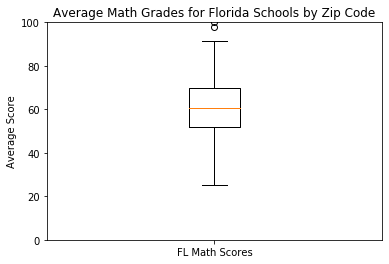

In [265]:
# Generate a box plot
score_list = ["FL Math Scores"]
fig1, ax1 = plt.subplots()
plt.ylim(0, 100)
ax1.set_title("Average Math Grades for Florida Schools by Zip Code")
ax1.set_ylabel("Average Score")
plt.boxplot(avg_math_score, labels=score_list)
plt.show()

In [266]:
# IQR calculations
quartiles = table_1["2019 Grade"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 3.3333333333333335
Upper Quartile: 4.5
IQR: 1.1666666666666665
Median: 4.0 
Values below 1.5833333333333337 could be outliers.
Values above 6.25 could be outliers.


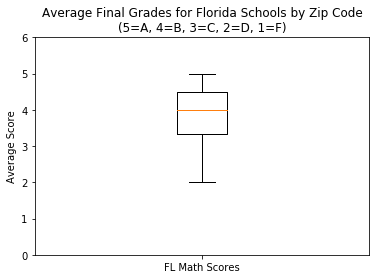

In [267]:
# Generate a box plot
score_list_2 = ["FL 2019 Grades"]
fig1, ax1 = plt.subplots()
plt.ylim(0, 6)
ax1.set_title("Average Final Grades for Florida Schools by Zip Code\n(5=A, 4=B, 3=C, 2=D, 1=F)")
ax1.set_ylabel("Average Score")
plt.boxplot(avg_2019_grades, labels=score_list_2)
plt.show()

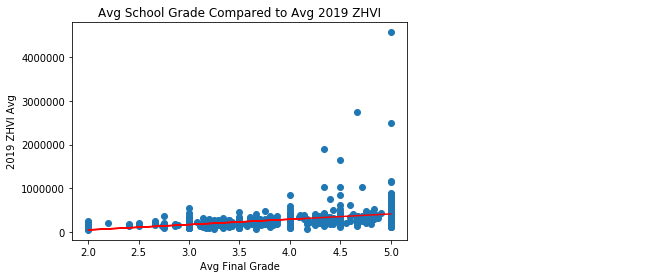

The linear regression equation is y = 121778.21x + -191620.55
The correlation is equal to 0.38


In [268]:
# Calculate the correlation coefficient
correlation_2 = sts.pearsonr(avg_2019_grades,avg_2019_zhvi)

# Plot the correlation
x_values = table_1["2019 Grade"]
y_values = table_1["2019 ZHVI Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Avg Final Grade")
plt.ylabel("2019 ZHVI Avg")
plt.title("Avg School Grade Compared to Avg 2019 ZHVI")
plt.show()

# Print regression equation and correlation coefficient
print(f"The linear regression equation is {line_eq}")
print(f"The correlation is equal to {round(correlation[0],2)}")